# <center>Multivariate Linear Regression on House Pricing Data</center>

### <center>Source: Kaggle - House Prices: Advanced Regression Techniques
## <center>[Kaggle DataSet](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview)</center>


In [881]:
%matplotlib inline
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
from itertools import combinations
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.feature_selection import RFE
from numpy.polynomial.polynomial import polyfit
from pandas import Series
import matplotlib.pylab as plt
from statsmodels.compat import lzip

In [882]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelBinarizer
from sklearn.linear_model import LinearRegression


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Data Engineering

In [1039]:
traindf = pd.read_csv('train.csv')

In [1040]:
len(traindf)

1460

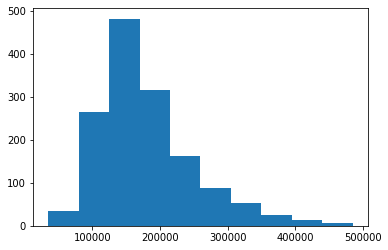

In [1045]:
plt.hist(traindf['SalePrice']);

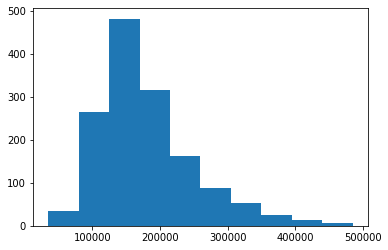

In [1046]:
traindf = traindf.loc[traindf['SalePrice'] < 500000]
plt.hist(traindf['SalePrice']);

#### Removing data with more than 30% NAN values 

In [1047]:
drop_list = ['Exterior2nd', 'YearRemodAdd', 'LotShape', 'MSSubClass', 'TotalBsmtSF', 'Alley', 'GarageYrBlt', 'PoolQC', 'MiscFeature', 'MiscFeature']

#### Moving Sale Price over to targetdf

In [1048]:
targetdf = traindf[['Id', 'SalePrice']]
traindf.drop('SalePrice', axis=1, inplace=True)

#### Removing problematic columns

In [1049]:
traindf = traindf.drop(drop_list, axis=1)

#### Seperating the catagorical and numerical data

In [1050]:
traindf_cat = traindf[['Id', 'MSZoning']].copy()
traindf.drop('MSZoning', axis=1, inplace=True)

In [1051]:
lotfront = traindf.LotFrontage.mean()

### Replacing NA values with the mean value for the column

In [1052]:
traindf.LotFrontage.fillna(value=lotfront, inplace=True)

In [1053]:
traindf_cat.FireplaceQu = traindf.FireplaceQu
traindf_cat.FireplaceQu.fillna(value='None', inplace=True)
traindf.drop('FireplaceQu', axis = 1, inplace=True)

In [1054]:
traindf_cat['Street'] = traindf.Street
traindf.drop('Street', axis=1, inplace=True)

In [1055]:
traindf_cat['LandContour'] = traindf.LandContour
traindf.drop('LandContour', axis=1, inplace=True)

In [1056]:
traindf_cat['Utilities'] = traindf.Utilities
traindf.drop('Utilities', axis=1, inplace=True)

In [1057]:
traindf_cat['LotConfig'] = traindf.LotConfig
traindf.drop('LotConfig', axis=1, inplace=True)

In [1058]:
traindf_cat['LandSlope'] = traindf.LandSlope
traindf.drop('LandSlope', axis=1, inplace=True)

In [1059]:
traindf_cat['Neighborhood'] = traindf.Neighborhood
traindf.drop('Neighborhood', axis=1, inplace=True)

In [1060]:
traindf_cat['Condition1'] = traindf.Condition1
traindf.drop('Condition1', axis=1, inplace=True)

traindf_cat['Condition2'] = traindf.Condition2
traindf.drop('Condition2', axis=1, inplace=True)

In [1061]:
traindf_cat['BldgType'] = traindf.BldgType
traindf.drop('BldgType', axis=1, inplace=True)

In [1062]:
traindf_cat['HouseStyle'] = traindf.HouseStyle
traindf.drop('HouseStyle', axis=1, inplace=True)

In [1063]:
traindf_cat['RoofStyle'] = traindf.RoofStyle
traindf.drop('RoofStyle', axis=1, inplace=True)

In [1064]:
traindf_cat['RoofMatl'] = traindf.RoofMatl
traindf.drop('RoofMatl', axis=1, inplace=True)

In [1065]:
traindf_cat['Exterior1st'] = traindf.Exterior1st
traindf.drop('Exterior1st', axis=1, inplace=True)

#traindf_cat['Exterior2nd'] = traindf.Exterior2nd
#traindf.drop('Exterior2nd', axis=1, inplace=True)

In [1066]:
traindf.MasVnrType.fillna(value='None', inplace=True)
traindf_cat['MasVnrType'] = traindf.MasVnrType
traindf.drop('MasVnrType', axis=1, inplace=True)

In [1067]:
traindf_cat.ExterQual = traindf.ExterQual
traindf.drop('ExterQual', axis=1, inplace=True)

In [1068]:
traindf_cat.ExterCond = traindf.ExterCond 
traindf.drop('ExterCond', axis=1, inplace=True)

In [1069]:
traindf_cat['Foundation'] = traindf.Foundation
traindf.drop('Foundation', axis=1, inplace=True)

In [1070]:
traindf.MasVnrArea.fillna(value=0.00, inplace=True) 

In [1071]:
traindf_cat.BsmtCond = traindf.BsmtCond
traindf.drop('BsmtCond', axis=1, inplace=True)

In [1072]:
traindf_cat.BsmtFinType1 = traindf.BsmtFinType1
traindf.drop('BsmtFinType1', axis=1, inplace=True)

In [1073]:
traindf_cat.BsmtExposure = traindf.BsmtExposure
traindf.drop('BsmtExposure', axis=1, inplace=True)

In [1074]:
traindf_cat.BsmtQual = traindf.BsmtQual
traindf.drop('BsmtQual',axis=1, inplace=True)

In [1075]:
traindf_cat.BsmtFinType2 = traindf.BsmtFinType2
traindf.drop('BsmtFinType2', axis=1, inplace=True)

In [1076]:
traindf_cat['Heating'] = traindf.Heating
traindf.drop('Heating', axis=1, inplace=True)

In [1077]:
traindf.HeatingQC = traindf.HeatingQC
traindf.drop('HeatingQC', axis=1, inplace=True)

In [1078]:
traindf_cat['CentralAir'] = traindf.CentralAir
traindf.drop('CentralAir', axis=1, inplace=True)

In [1079]:
traindf_cat['Electrical'] = traindf.Electrical
traindf.drop('Electrical', axis=1, inplace=True)
traindf_cat.Electrical.fillna(value='None', inplace=True)

In [1080]:
traindf_cat.KitchenQual = traindf.KitchenQual
traindf.drop('KitchenQual', axis=1, inplace=True)

In [1081]:
traindf_cat['Functional'] = traindf.Functional
traindf.drop('Functional', axis=1, inplace=True)

In [1082]:
traindf_cat['GarageType'] = traindf.GarageType
traindf.drop('GarageType', axis=1, inplace=True)
traindf_cat.GarageType.fillna(value='NoGarage', inplace=True)

In [1083]:
traindf_cat.GarageFinish = traindf.GarageFinish
traindf.drop('GarageFinish', axis=1, inplace=True)

In [1084]:
traindf_cat.GarageQual = traindf.GarageQual
traindf.drop('GarageQual', axis=1, inplace=True)

In [1085]:
traindf_cat.GarageCond = traindf.GarageCond
traindf.drop('GarageCond',axis=1, inplace=True)

In [1086]:
traindf_cat['PavedDrive'] = traindf.PavedDrive
traindf.drop('PavedDrive', axis=1, inplace=True)

In [1087]:
traindf_cat['Fence'] = traindf.Fence
traindf.drop('Fence', axis=1, inplace=True)
traindf_cat.fillna(value='NoFence', inplace=True)

In [1088]:
traindf_cat['MoSold'] = traindf.MoSold
traindf.drop('MoSold', axis=1, inplace=True)

In [1089]:
traindf_cat['SaleType'] = traindf.SaleType
traindf.drop('SaleType', axis=1, inplace=True)

In [1090]:
traindf_cat['SaleCondition'] = traindf.SaleCondition
traindf.drop('SaleCondition', axis=1, inplace=True)

In [1091]:
traindf_cat['BsmtFullBath'] = traindf.BsmtFullBath
traindf.drop('BsmtFullBath', axis=1, inplace=True)

In [1092]:
traindf_cat['BsmtHalfBath'] = traindf.BsmtHalfBath
traindf.drop('BsmtHalfBath', axis=1, inplace=True)

In [1093]:
traindf_cat['FullBath'] = traindf.FullBath
traindf.drop('FullBath', axis=1, inplace=True)

In [1094]:
traindf_cat['HalfBath'] = traindf.HalfBath
traindf.drop('HalfBath', axis=1, inplace=True)

In [1095]:
traindf_cat['BedroomAbvGr'] = traindf.BedroomAbvGr
traindf.drop('BedroomAbvGr', axis=1, inplace=True)

In [1096]:
traindf_cat['KitchenAbvGr'] = traindf.KitchenAbvGr
traindf.drop('KitchenAbvGr', axis=1, inplace=True)

In [1097]:
traindf_cat['TotRmsAbvGrd'] = traindf.TotRmsAbvGrd
traindf.drop('TotRmsAbvGrd', axis=1, inplace=True)

In [1098]:
traindf_cat['Fireplaces'] = traindf.Fireplaces
traindf.drop('Fireplaces', axis=1, inplace=True)

In [1099]:
traindf_cat['GarageCars'] = traindf.GarageCars
traindf.drop('GarageCars', axis=1, inplace=True)

In [1100]:
traindf['ThreeSsnPorch'] = traindf['3SsnPorch']
traindf.drop('3SsnPorch', axis=1, inplace=True)

In [1101]:
traindf['FirstFlrSF'] = traindf['1stFlrSF']
traindf.drop('1stFlrSF', axis=1, inplace=True)

In [1102]:
traindf['SecondFlrSF'] = traindf['2ndFlrSF']
traindf.drop('2ndFlrSF', axis=1, inplace=True)

## Feature Scaling - Apply Box-Cox?
### Box-Cox did not improve the model

In [1103]:
traindf_cat.shape

(1451, 36)

In [1104]:
traindf_columns = traindf.columns

In [1105]:
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,730.079256,69.833054,10442.747760,6.079256,5.578222,1971.071675,99.972433,437.809097,46.466575,566.076499,...,93.669194,46.455548,22.090283,14.760165,2.393522,43.758787,2007.813921,3.430737,1156.673329,342.745003
std,422.163067,21.842884,9916.673175,1.362524,1.115370,30.189728,173.498236,447.757832,161.264463,440.565397,...,124.707744,66.345854,61.283981,55.342585,37.599673,497.648467,1.326587,29.406940,379.591002,429.825177
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,334.000000,0.000000
25%,364.500000,60.000000,7517.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000,882.000000,0.000000
50%,729.000000,69.833054,9452.000000,6.000000,5.000000,1972.000000,0.000000,381.000000,0.000000,476.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,1085.000000,0.000000
75%,1095.500000,78.500000,11506.000000,7.000000,6.000000,2000.000000,160.500000,705.500000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,1382.500000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,508.000000,4692.000000,1818.000000


In [1106]:
#traindf = traindf + 1
traindf.min()

Id                  1.0
LotFrontage        21.0
LotArea          1300.0
OverallQual         1.0
OverallCond         1.0
YearBuilt        1872.0
MasVnrArea          0.0
BsmtFinSF1          0.0
BsmtFinSF2          0.0
BsmtUnfSF           0.0
LowQualFinSF        0.0
GrLivArea         334.0
GarageArea          0.0
WoodDeckSF          0.0
OpenPorchSF         0.0
EnclosedPorch       0.0
ScreenPorch         0.0
PoolArea            0.0
MiscVal             0.0
YrSold           2006.0
ThreeSsnPorch       0.0
FirstFlrSF        334.0
SecondFlrSF         0.0
dtype: float64

In [1107]:
import scipy.stats
low_vals = []
box = ['LotArea', 'OverallCond', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'YrSold', 'ThreeSsnPorch', 'FirstFlrSF', 'SecondFlrSF']
box1 = 'OverallCond'
for ox in box:
    print(f"traindf['{ox}'] = stats.boxcox(traindf['{ox}'])[0]")
    print(traindf[f'{ox}'].min(), ox)

traindf['LotArea'] = stats.boxcox(traindf['LotArea'])[0]
1300 LotArea
traindf['OverallCond'] = stats.boxcox(traindf['OverallCond'])[0]
1 OverallCond
traindf['YearBuilt'] = stats.boxcox(traindf['YearBuilt'])[0]
1872 YearBuilt
traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
0.0 MasVnrArea
traindf['BsmtFinSF1'] = stats.boxcox(traindf['BsmtFinSF1'])[0]
0 BsmtFinSF1
traindf['BsmtFinSF2'] = stats.boxcox(traindf['BsmtFinSF2'])[0]
0 BsmtFinSF2
traindf['BsmtUnfSF'] = stats.boxcox(traindf['BsmtUnfSF'])[0]
0 BsmtUnfSF
traindf['WoodDeckSF'] = stats.boxcox(traindf['WoodDeckSF'])[0]
0 WoodDeckSF
traindf['OpenPorchSF'] = stats.boxcox(traindf['OpenPorchSF'])[0]
0 OpenPorchSF
traindf['EnclosedPorch'] = stats.boxcox(traindf['EnclosedPorch'])[0]
0 EnclosedPorch
traindf['ScreenPorch'] = stats.boxcox(traindf['ScreenPorch'])[0]
0 ScreenPorch
traindf['PoolArea'] = stats.boxcox(traindf['PoolArea'])[0]
0 PoolArea
traindf['MiscVal'] = stats.boxcox(traindf['MiscVal'])[0]
0 MiscVal
traindf['YrSold'

In [1108]:
#traindf['LotArea'] = stats.boxcox(traindf['LotArea'])[0]
#traindf['YearBuilt'] = stats.boxcox(traindf['YearBuilt'])[0]
#traindf['OverallCond'] = stats.boxcox(traindf['OverallCond'])[0]
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
#traindf['BsmtFinSF1'] = stats.boxcox(traindf['BsmtFinSF1'])[0]
#traindf['BsmtFinSF2'] = stats.boxcox(traindf['BsmtFinSF2'])[0]
#traindf['BsmtUnfSF'] = stats.boxcox(traindf['BsmtUnfSF'])[0]
#traindf['WoodDeckSF'] = stats.boxcox(traindf['WoodDeckSF'])[0]
#traindf['OpenPorchSF'] = stats.boxcox(traindf['OpenPorchSF'])[0]
#traindf['EnclosedPorch'] = stats.boxcox(traindf['EnclosedPorch'])[0]
#traindf['ScreenPorch'] = stats.boxcox(traindf['ScreenPorch'])[0]
#traindf['PoolArea'] = stats.boxcox(traindf['PoolArea'])[0]
#traindf['MiscVal'] = stats.boxcox(traindf['MiscVal'])[0]
#traindf['YrSold'] = stats.boxcox(traindf['YrSold'])[0]
#traindf['ThreeSsnPorch'] =x stats.boxcox(traindf['ThreeSsnPorch'])[0]
#traindf['FirstFlrSF'] = stats.boxcox(traindf['FirstFlrSF'])[0]
#traindf['SecondFlrSF'] = stats.boxcox(traindf['SecondFlrSF'])[0]

In [1109]:
#x = traindf['MasVnrArea'].replace(0, 'nan')
#l = stats.boxcox(x.dropna())[1]


In [1110]:
#traindf['MasVnrArea'] = stats.boxcox(traindf['MasVnrArea'])[0]
traindf.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,...,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,730.079256,69.833054,10442.747760,6.079256,5.578222,1971.071675,99.972433,437.809097,46.466575,566.076499,...,93.669194,46.455548,22.090283,14.760165,2.393522,43.758787,2007.813921,3.430737,1156.673329,342.745003
std,422.163067,21.842884,9916.673175,1.362524,1.115370,30.189728,173.498236,447.757832,161.264463,440.565397,...,124.707744,66.345854,61.283981,55.342585,37.599673,497.648467,1.326587,29.406940,379.591002,429.825177
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2006.000000,0.000000,334.000000,0.000000
25%,364.500000,60.000000,7517.500000,5.000000,5.000000,1954.000000,0.000000,0.000000,0.000000,222.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2007.000000,0.000000,882.000000,0.000000
50%,729.000000,69.833054,9452.000000,6.000000,5.000000,1972.000000,0.000000,381.000000,0.000000,476.000000,...,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,2008.000000,0.000000,1085.000000,0.000000
75%,1095.500000,78.500000,11506.000000,7.000000,6.000000,2000.000000,160.500000,705.500000,0.000000,808.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,2009.000000,0.000000,1382.500000,728.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,...,857.000000,547.000000,552.000000,480.000000,738.000000,15500.000000,2010.000000,508.000000,4692.000000,1818.000000


In [1111]:
from sklearn.preprocessing import StandardScaler
from scipy import stats

ss = StandardScaler()

traindfss = pd.DataFrame(ss.fit_transform(traindf))
traindfss.set_index(traindf.Id, inplace=True)
traindfss.columns = traindf_columns 
# Remove outliers, i.e. data points outside of 2 standard deviations of the mean
traindfss = traindfss[(np.abs(stats.zscore(traindfss)) < 2).all(axis=1)]
#X_train_numeric.head()

In [1112]:
traindfss.drop('Id', axis=1, inplace=True)

In [1113]:
traindfss.describe()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,LowQualFinSF,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,PoolArea,MiscVal,YrSold,ThreeSsnPorch,FirstFlrSF,SecondFlrSF
count,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,...,672.000000,672.000000,672.000000,672.000000,6.720000e+02,672.000000,672.000000,672.000000,672.000000,672.000000
mean,-0.124569,-0.124605,-0.087687,-0.134217,0.181348,-0.204482,-0.018354,-0.225865,-0.074904,-0.114118,...,-0.117884,-0.162851,-0.240393,-0.232422,-6.367999e-02,-0.059622,-0.007805,-0.115540,-0.225447,-0.076375
std,0.629551,0.348100,0.814539,0.668304,0.878302,0.603612,0.848697,0.293837,0.854089,0.098712,...,0.760738,0.657517,0.441600,0.254647,2.222100e-16,0.173672,1.021811,0.030182,0.705899,0.909292
min,-1.824246,-0.854285,-1.526558,-1.415464,-1.924221,-0.576415,-0.978118,-0.288238,-1.285329,-0.120619,...,-0.751369,-0.700444,-0.360582,-0.266797,-6.367999e-02,-0.087961,-1.367831,-0.116704,-1.677840,-0.797681
25%,-0.450327,-0.325145,-0.792373,-0.518592,-0.466269,-0.576415,-0.978118,-0.288238,-0.752308,-0.120619,...,-0.751369,-0.700444,-0.360582,-0.266797,-6.367999e-02,-0.087961,-0.613757,-0.116704,-0.771289,-0.797681
50%,0.000000,-0.152346,-0.058188,-0.518592,0.213004,-0.576415,0.004895,-0.288238,-0.243127,-0.120619,...,-0.751369,-0.368734,-0.360582,-0.266797,-6.367999e-02,-0.087961,0.140317,-0.116704,-0.308790,-0.797681
75%,0.236632,0.032381,0.675997,0.378281,1.057954,0.046285,0.595820,-0.288238,0.501060,-0.120619,...,0.443837,0.189142,-0.360582,-0.266797,-6.367999e-02,-0.087961,0.894391,-0.116704,0.242652,0.857633
max,1.793740,1.968703,1.410181,1.275154,1.256765,1.972040,1.997730,1.957296,1.975242,1.520246,...,1.991989,1.892925,1.989945,1.938413,-6.367999e-02,1.319139,1.648465,0.665694,1.885117,1.981151


In [1114]:
#sns.pairplot(traindf)

## Getting dummies

In [1115]:
traindf_cat.Exterior1st.unique()

array(['VinylSd', 'MetalSd', 'Wd Sdng', 'HdBoard', 'BrkFace', 'WdShing',
       'CemntBd', 'Plywood', 'AsbShng', 'Stucco', 'BrkComm', 'AsphShn',
       'Stone', 'ImStucc', 'CBlock'], dtype=object)

In [1116]:
traindf_cat.HouseStyle= traindf_cat.HouseStyle.replace({'1.5Fin': '1.5_Fin', '1.5Unf': '1_5Unf', '2.5Unf':'2_5Unf', '2.5Fin':'2_5Fin'}, value=None)

In [1117]:
traindf_cat.Exterior1st= traindf_cat.Exterior1st.replace({'Wd Sdng': 'Wd_Sdng'}, value=None)

In [1118]:
traindf_cat.RoofMatl= traindf_cat.RoofMatl.replace({'Tar&Grv': 'TarGrv'}, value=None)

In [1119]:
cat_list = list(traindf_cat.columns)[1:]

In [1120]:
traindf_cat_bined= pd.get_dummies(traindf_cat, columns=cat_list, drop_first=True)
#traindf_cat_bined = traindf_cat_bined.astype('object')
#traindf_cat_bined['Id'] = traindf_cat_bined['Id'].astype('int64')

In [1121]:
traindf_cat_bined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Columns: 191 entries, Id to GarageCars_4
dtypes: int64(1), uint8(190)
memory usage: 291.9 KB


In [1122]:
columnfixlist = [traindf_cat_bined.columns[i] for i in range(len(traindf_cat_bined.columns))]
#columnfixlist

In [1123]:
train_combined = pd.merge(traindf_cat_bined, traindfss, on='Id', left_index=True, right_index=True)

In [1124]:
targetdf = targetdf.loc[train_combined.index]

In [1125]:
targetdf.head()

,Id,SalePrice
0,1,208500
1,2,181500
2,3,223500
3,4,140000
4,5,250000


In [1126]:
train_combined.drop('Id', axis=1, inplace=True)

In [1127]:
targetdf.set_index('Id', inplace=True)

In [1128]:
targetdf.head()

,SalePrice
Id,
1,208500
2,181500
3,223500
4,140000
5,250000


## Testing for colinearity amonst columns

### Function for testing for intercorrelation - without looking at pairplots...

In [1129]:
def test_colinear(train_combined):
    col_names = list(train_combined.columns)
    
    colinear = []
    for ax1 in col_names:
        for ax2 in col_names:
            try:
                if ax1 == ax2:
                    break
                else:
                    if train_combined[f'{ax1}'].corr(train_combined[f'{ax2}']) >= .75:
                        colinear.append((ax1,ax2))
            except:
                continue
    return colinear

## Attempting to use Linear Regression without ridge, lasso, or elastic net

In [1130]:
test_colinear(train_combined)

[('Neighborhood_Somerst', 'MSZoning_FV'),
 ('SaleCondition_Partial', 'SaleType_New'),
 ('TotRmsAbvGrd_14', 'BedroomAbvGr_8'),
 ('SecondFlrSF', 'GrLivArea')]

In [1131]:
corr_saleprice = {}
least_impact = []

for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
    if abs(corr_saleprice[i]) > abs(corr_saleprice[k]):
        least_impact.append(k)
    else:
        least_impact.append(i)
        
print(least_impact)
corr_saleprice

['MSZoning_FV', 'SaleType_New', 'TotRmsAbvGrd_14', 'SecondFlrSF']


{'Neighborhood_Somerst': -0.01356157138043124,
 'MSZoning_FV': -0.003756395956560909,
 'SaleCondition_Partial': -0.015947643918901078,
 'SaleType_New': -0.007514006587967392,
 'TotRmsAbvGrd_14': -0.018962643089791904,
 'BedroomAbvGr_8': -0.018962643089791904,
 'SecondFlrSF': 7.745861870765766e-05,
 'GrLivArea': 0.006503721161157259}

In [1132]:
train_combined.drop(least_impact, axis=1, inplace=True)

In [1133]:
from sklearn.model_selection import train_test_split
X = train_combined
y = targetdf

# Train-test split, then "set aside" test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.19, random_state=1)

### Testing the linear regression ---- Too many features ---- Use Lasso or Elastic Net


In [1134]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_hat = lr.predict(X_test)

In [1135]:
y_hatpd = pd.DataFrame(y_hat, columns = ['SalePrice'], index = [i for i in range(len(y_hat))])

In [1136]:
from sklearn.metrics import r2_score, mean_squared_error 


print(f"intercept: {lr.intercept_}")
print(f"r^2: {r2_score(y_test, y_hat)}")
print(f"rmse: {np.sqrt(mean_squared_error(y_test, y_hat))}")

intercept: [1.05536512e+17]
r^2: -9.459792091327058e+21
rmse: 7005534080799955.0


In [1137]:
 ### Previous R^2 values ###


### Added Rooms, Car garage, fireplaces and some other continuous/discrete values to the catagorical side of the table... increased features
### by approx 30 --- need to check R^2 adj 
# r^2: 0.898540213574302
# rmse: 25772.696681156067

### Replaced lot frontage with mean value instead of '0'
# r^2: 0.8175929129184736
# rmse: 34972.641412123485


### Initial R^2 to beat
# r^2: 0.6589675323
# rmse: 36779.91592177666

In [1138]:
import statsmodels.formula.api as sm
import statsmodels.tools as smtools
#train_combined_string = ''
#for i in [train_combined.columns[i] for i in range(len(train_combined.columns))]:
 #   train_combined_string += i + ' + ' 
#train_combined_string = train_combined_string[0:-3]


#train_combined_withc = smtools.add_constant(train_combined)
#sm_formula = ("SalePrice ~ " + train_combined_string ) 
#ols_data = pd.merge(targetdf, train_combined_withc, left_index=True, right_index=True)

#results = sm.ols(formula = sm_formula,data = ols_data).fit()

# Lasso Regression

In [1139]:
import statsmodels.tools.tools as smtools
train_combined_withc = smtools.add_constant(train_combined)

In [1140]:
from sklearn.model_selection import train_test_split
X = train_combined_withc
y = targetdf

# Train-test split, then "set aside" test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20)

### Arbitrary Alpha = .5 Lasso Regression

In [1149]:
Lassoreg = Lasso(alpha= .5, max_iter = 1000000000, normalize = False)
Lassoreg.fit(X_train, y_train)
L_target_prediction = Lassoreg.predict(X_test)

print(f'R2 on test: {Lassoreg.score(X_test, y_test)},\nR2 on all: {Lassoreg.score(X,y)}')


R2 on test: 0.7073164817487085,
R2 on all: 0.8699084151553511


The difference in the R2 is not significant enough to warrent overfitting this model decent. 

Can we optimize alpha?

# Optimizing alpha term

[(0.5, 0.9020548590711268, 0.7652588271683791),
 (0.5344827586206896, 0.9020530038659716, 0.7649681912850825),
 (0.5689655172413793, 0.9020510207190001, 0.7649634325621195),
 (0.603448275862069, 0.9020489077564836, 0.7652445638923657),
 (0.6379310344827587, 0.9020466825503889, 0.7649530227725859),
 (0.6724137931034483, 0.9020443275015855, 0.7649473716408337),
 (0.7068965517241379, 0.9020418484340779, 0.7649414229160822),
 (0.7413793103448276, 0.9020392452865286, 0.764935176451147),
 (0.7758620689655172, 0.9020365180212442, 0.7649286321555797),
 (0.8103448275862069, 0.9020336665044918, 0.7649217897084772),
 (0.8448275862068966, 0.9020306906494051, 0.7649146489013968),
 (0.8793103448275862, 0.902027700019593, 0.7651937361638679),
 (0.9137931034482758, 0.9020246376278686, 0.7651863966530128),
 (0.9482758620689655, 0.9020215775632202, 0.7654641512919584),
 (0.9827586206896551, 0.9020184877255895, 0.7654567549931297),
 (1.0172413793103448, 0.902015286210322, 0.7654490913659583),
 (1.0517241

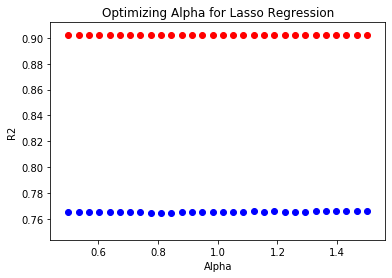

In [1148]:
from sklearn.linear_model import Lasso #### try alphas; check adj R^2
a = .05
results = []

for a in np.linspace(.5, 1.5, num=30):
    Lassoreg = Lasso(alpha= a, max_iter = 1000000000, normalize = False)
    Lassoreg.fit(X, y)
    L_target_prediction = Lassoreg.predict(X_test)
    lassCoef = Lassoreg.coef_
    
    count = 0
    
    for i in Lassoreg.coef_: ### If the coef is significantly small the term is considered removed
        if abs(i) < .01:
            count += 1       ### Here is the numver of terms removed
    
    R2 = Lassoreg.score(X, y)
    n = len(X)
    k = len(X.columns) - count     ### here the original number of terms is subtracted by the insignificant terms
    adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
    
    results.append((a, R2, adjR2))

    plt.scatter(x=a, y = adjR2, c='b')
    plt.scatter(x=a, y = R2, c='r')
    plt.xlabel('Alpha')
    plt.ylabel('R2')
    plt.title('Optimizing Alpha for Lasso Regression')
results   
    #print(f'Adjusted R2: {adjR2}')

# Final model - Incorperating all the data for the best model

In [1147]:
Lassoreg = Lasso(alpha= 1.34, max_iter = 1000000000, normalize = False)
Lassoreg.fit(X, y)
L_target_prediction = Lassoreg.predict(X)
lassCoef = Lassoreg.coef_

count = 0
for i in Lassoreg.coef_:
    if abs(i) < .01:
        count += 1
    
R2 = Lassoreg.score(X, y)
n = len(X)
k = len(X.columns) - count
adjR2 = R2 - ((n - 1)/(n - k)) * (1 - R2)
rmse = (mean_squared_error(y, L_target_prediction))**.5

print(f'rmse: {rmse}')
print(f'saleprice mean: {y.SalePrice.mean()}')
print(f'Adjusted R2: {adjR2}') 
print(f'R2: {Lassoreg.score(X, y)}')

rmse: 24016.52425600875
saleprice mean: 181333.4343283582
Adjusted R2: 0.765931653457979
R2: 0.9019800668694578


In [1150]:
coef_col =  {}

for i in range(len(Lassoreg.coef_)):
    coef_col[Lassoreg.coef_[i]] =  train_combined.columns[i] 
for key in sorted(coef_col.keys()):
    print(f'{key}, {coef_col[key]}')

-176086.71690171296, Condition2_PosN
-103857.34208554999, BedroomAbvGr_6
-66331.65914943878, BedroomAbvGr_5
-49863.017628128815, RoofMatl_TarGrv
-49554.31972750602, BedroomAbvGr_3
-49438.261271508985, Heating_Wall
-48719.01151595273, TotRmsAbvGrd_3
-46467.62827162921, ThreeSsnPorch
-43751.92087164166, BedroomAbvGr_4
-39077.43181067899, BedroomAbvGr_2
-37347.28465726665, LandSlope_Sev
-34866.53875268731, BldgType_Twnhs
-32851.6521564563, SaleCondition_Family
-32565.412902102285, Foundation_Wood
-31766.652818586284, SaleCondition_Alloca
-29197.718427090716, TotRmsAbvGrd_4
-26906.989071983477, BldgType_TwnhsE
-26232.715520697533, Neighborhood_ClearCr
-26020.951619164003, Neighborhood_MeadowV
-24405.66070404813, Functional_Maj2
-23273.96372507643, Neighborhood_Edwards
-22969.678975976996, HouseStyle_2_5Fin
-21954.903505302627, RoofMatl_CompShg
-21642.06892435891, Neighborhood_NAmes
-21193.495955833536, Functional_Mod
-20887.7728237488, Condition2_RRNn
-20638.59210702802, Neighborhood_Gilbe

## Confirming Assumptions are upheld

### No Collinearity between features

In [1151]:
test_colinear(train_combined)

[]

In [1152]:
corr_saleprice = {}
for i, k in test_colinear(train_combined):
    corr_saleprice[i] = train_combined[f'{i}'].corr(targetdf['SalePrice'])
    corr_saleprice[k] = train_combined[f'{k}'].corr(targetdf['SalePrice'])
corr_saleprice

{}

### Normal distribution of residual: Q-Q plot

In [1154]:
residuals = L_target_prediction - y_test.SalePrice

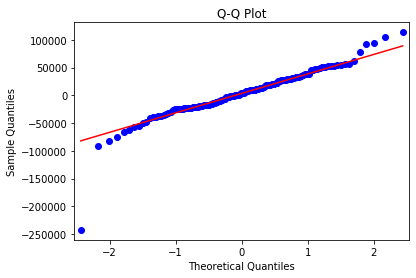

In [1156]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='q');
plt.title('Q-Q Plot');

### Homoscedasticity:

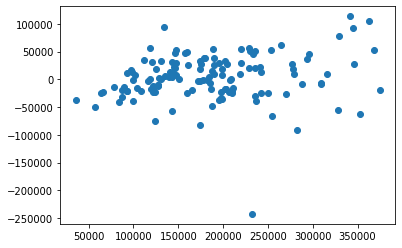

In [1157]:
plt.scatter(x = L_target_prediction, y = residuals);

### No AutoCorrelation

#### Durbin-Watson Test

In [1158]:
import statsmodels.stats.stattools as stools
stools.durbin_watson(residuals)


2.124269097656479

Value is extremely close to 2, by definition a value of 2 means there is no auto correlation.

### Implementation of XGBoost


In [1159]:
import xgboost
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [1160]:
XGBoost = XGBRegressor()
XGBoost.fit(X_train, y_train)

y_pred = XGBoost.predict(X_test)
XGBoost_mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(XGBoost_mse))

[17:37:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
45226.63545012465
